In [30]:
from ete3 import Tree
import pandas as pd
import seaborn as sns

In [15]:
df = pd.DataFrame(columns=['rep','id', 'newick'])
nb = 0
for rep in range(1, 53):
    if rep not in [15, 16]:
        path_t = './data_{}/solution.nwk'.format(rep)
        t = Tree(path_t, format=1)
        #print(t)
        for node in t.traverse():
            if len(node.children) == 1:
                node.delete()
        #print(t)
        nwk = t.write(format=9)
        print(nwk)
        nb += 1
        df.loc[rep] = [rep, nb, nwk]
df.to_csv('./df_solutions.csv', sep=';', encoding='utf-8', header=True, index=False)

((transcript11_ggor,((((transcript19_ppan,(transcript20_ppan,transcript12_ppan)),transcript12_ptro),((transcript19_hsap,(transcript20_hsap,transcript18_hsap)),(transcript21_hsap,transcript12_hsap))),(transcript16_ggor,((transcript18_ggor,transcript12_ggor),(transcript19_ggor,transcript17_ggor))))),transcript8_pabe);
((((transcript11_hsap,transcript11_ggor),transcript12_ggor),((transcript31_hsap,transcript13_hsap),transcript9_ptro)),(transcript18_pabe,transcript8_pabe));
((((transcript0_ppan,transcript0_ptro),transcript0_hsap),transcript0_ggor),transcript0_pabe);
((((transcript10_ppan,transcript10_ptro),transcript10_hsap),transcript10_ggor),((transcript9_ggor,(transcript17_ggor,(transcript18_ggor,transcript14_ggor))),((transcript15_ppan,transcript9_ppan),(transcript17_ptro,transcript9_ptro))));
(((transcript0_ENSHGLG00100006079,(((transcript13_ENSHGLG00100006079,(transcript21_ENSHGLG00100006079,(transcript22_ENSHGLG00100006079,transcript20_ENSHGLG00100006079))),(((transcript20_ENSHGLG00

# REFERENCE

In [31]:
df_giga = pd.read_csv('./../Giga/giga_out.csv', sep=';')
df_min = pd.read_csv('../MinCLevol/min-minclevol.csv', sep=';')
df_max = pd.read_csv('../MinCLevol/max-minclevol.csv', sep=';')
df_mean = pd.read_csv('../MinCLevol/mean-minclevol.csv', sep=';')
df_lab_min = pd.read_csv('../MinCLevol/labelled_min-minclevol.csv', sep=';')
df_lab_max = pd.read_csv('../MinCLevol/labelled_max-minclevol.csv', sep=';')
df_lab_mean = pd.read_csv('../MinCLevol/labelled_mean-minclevol.csv', sep=';')
df_solutions = pd.read_csv('./df_solutions.csv', sep=';')

dfs = [df_giga, df_min, df_max, df_mean, df_lab_min, df_lab_max, df_lab_mean]
rfs = []
ids = []
n_rfs = []
df_save = pd.DataFrame(columns=['nb', 'id', 'method', 'RF', 'nRF', '#leaves'])
nb = 0
for ix, df in enumerate(dfs):
    name = None
    if ix==0:
        name = 'GIGA'
    elif ix == 1:
        name = 'min_MinCLevol'
    elif ix == 2:
        name = 'max_MinCLevol'
    elif ix == 3:
        name = 'avg_MinCLevol'
    elif ix == 4:
        name = 'min_L-MinCLevol'
    elif ix == 5:
        name = 'max_L-MinCLevol'
    elif ix == 6:
        name = 'avg_L-MinCLevol'
    else:
        pass
    for iter, row in df.iterrows():
        nb += 1
        nwk = row.newick
        t = Tree(nwk)
        indice = row.id
        sol = df_solutions[df_solutions['id']==indice].newick_clean.values[0]
        t_ref = Tree(sol)
        nb_leaves = len(t_ref.get_leaves())

        rf = t_ref.robinson_foulds(t)
        normalized_rf = rf[0]/rf[1]

        df_save.loc[nb] = [nb, indice, name, rf, normalized_rf, nb_leaves]








In [210]:
df_save.to_csv('./comparisons.csv', sep=';', header=True, index=False)

In [32]:
df_save

,nb,id,method,RF,nRF,#leaves
1,1,1,GIGA,"[14, 28, {transcript21_hsap, transcript12_ggor...",0.500000,16
2,2,2,GIGA,"[4, 12, {transcript11_hsap, transcript18_pabe,...",0.333333,8
3,3,3,GIGA,"[0, 6, {transcript0_pabe, transcript0_ppan, tr...",0.000000,5
4,4,4,GIGA,"[14, 20, {transcript9_ptro, transcript9_ppan, ...",0.700000,12
5,5,5,GIGA,"[38, 52, {transcript21_ENSMUNG00000002391, tra...",0.730769,28
...,...,...,...,...,...,...
346,346,46,avg_L-MinCLevol,"[10, 18, {transcript37_ENSCGRG00000018457, tra...",0.555556,11
347,347,47,avg_L-MinCLevol,"[2, 18, {transcript51_MGP-PahariEiJ-G0020237, ...",0.111111,11
348,348,48,avg_L-MinCLevol,"[18, 24, {transcript46_ENSMUSG00000054036, tra...",0.750000,14
349,349,49,avg_L-MinCLevol,"[0, 10, {transcript28_ENSMUSG00000054036, tran...",0.000000,7


AttributeError: 'Axes' object has no attribute 'fig'

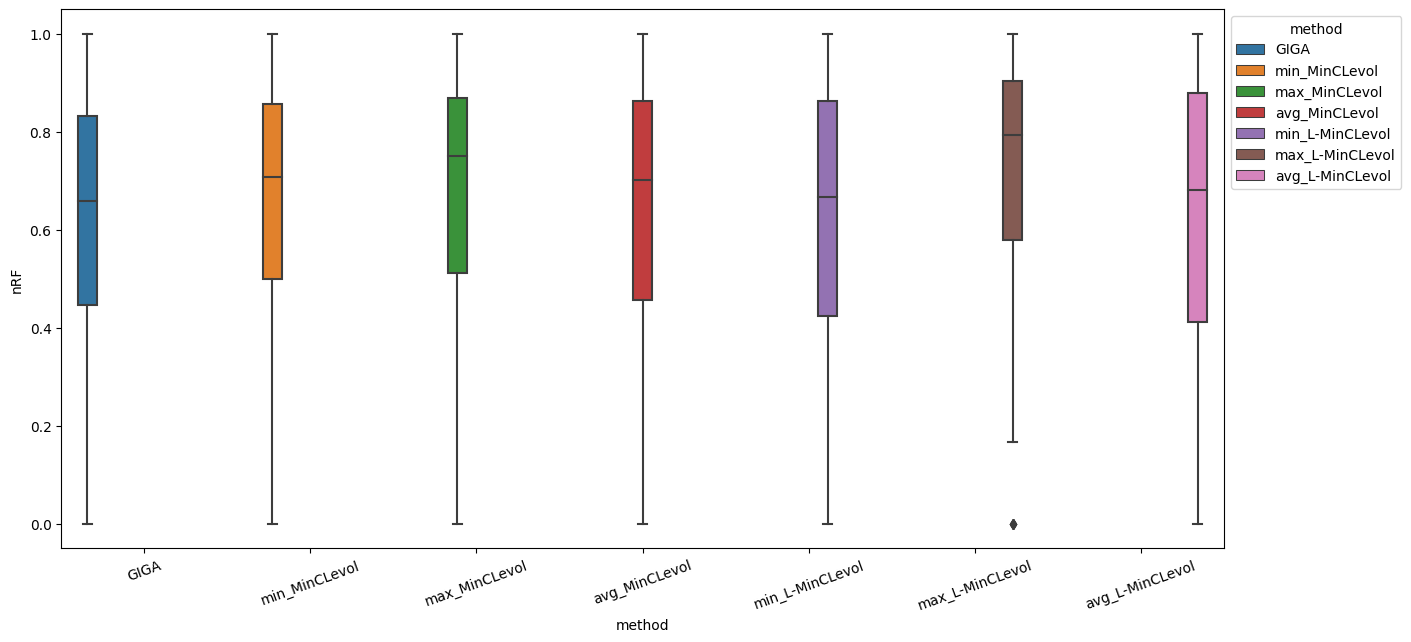

In [33]:
df = df_save
df
import matplotlib.pyplot as plt
plt.figure(figsize=[15,7])
plot = sns.boxplot(data=df, x="method", y="nRF", hue="method")
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))
plot.set_xticklabels(plot.get_xticklabels(), rotation=20)
plot.fig.set_dpi(50)

In [212]:
df = df_save

In [35]:
df_giga = df[df['method']=='GIGA']
df_giga
all_df = df[df['method']!='GIGA']
metrics = list(pd.Categorical(all_df['method']).categories)
#print(all_df)
data = pd.DataFrame(columns=['method', 'comparison'])
ind = list(set(list(df['id'].values)))
i = 0
for metric in metrics:
    i += 1
    df_metric = all_df[all_df['method']==metric]
    nbest = 0
    nbad = 0
    nequal = 0
    for indice in ind:
        score = df_metric[df_metric['id']==indice].nRF.values[0]
        score_giga = df_giga[df_giga['id']==indice].nRF.values[0]
        print(score, score_giga)
        if score == score_giga:
            nequal += 1
            i += 1
            data.loc[i] = [metric, 'equal RF']
        elif score > score_giga:
            nbad += 1
            i += 1
            data.loc[i] = [metric, 'worst RF']
        elif score < score_giga:
            nbest += 1
            i += 1
            data.loc[i] = [metric, 'best RF']
        else:
            raise ('error !!!')
    #data.loc[i] = [metric, nbest, nbad, nequal]
    
    
    

#data.to_csv('./all_comparisons_2.csv', sep=';', header=True, index=False)

0.7857142857142857 0.5
0.16666666666666666 0.3333333333333333
0.0 0.0
1.0 0.7
0.9615384615384616 0.7307692307692307
0.6666666666666666 0.5833333333333334
0.6956521739130435 0.782608695652174
0.8695652173913043 0.9565217391304348
0.8947368421052632 1.0
0.4444444444444444 0.6666666666666666
0.9166666666666666 1.0
0.9117647058823529 0.8235294117647058
0.75 1.0
0.65 0.65
1.0 1.0
0.8181818181818182 0.6363636363636364
0.3333333333333333 0.3333333333333333
0.2 1.0
0.0 0.0
0.5625 0.75
0.4 0.6
0.9130434782608695 0.9565217391304348
0.0 0.0
0.6153846153846154 0.6153846153846154
0.5714285714285714 0.42857142857142855
0.3333333333333333 0.3333333333333333
1.0 0.45454545454545453
0.5833333333333334 0.8333333333333334
0.9333333333333333 0.4
0.8095238095238095 0.7619047619047619
0.2 0.2
0.6363636363636364 0.6363636363636364
0.8571428571428571 0.9285714285714286
0.52 0.64
1.0 0.0
0.896551724137931 0.8275862068965517
0.6 0.6
0.9310344827586207 0.896551724137931
0.75 0.75
0.8823529411764706 0.58823529411

In [40]:
import seaborn as sns

C:\Users\ouew2201\AppData\Local\Temp\ipykernel_2408\3997822962.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=20)


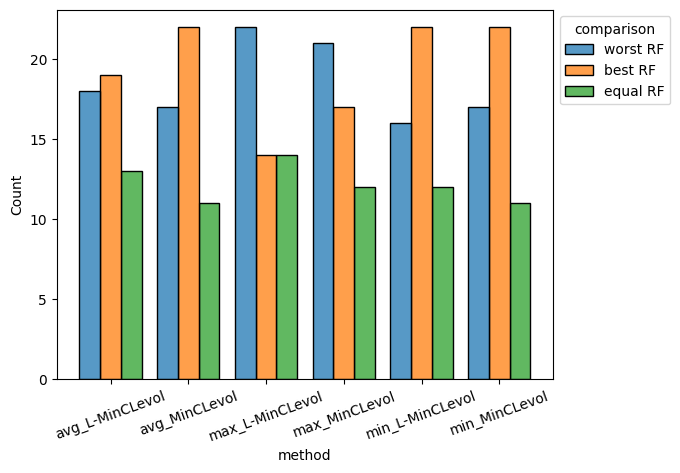

In [39]:
plot = sns.histplot(data=data, x="method", hue="comparison", multiple="dodge", shrink=.8)
plot.set_xticklabels(plot.get_xticklabels(), rotation=20)
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

In [96]:
df = data[data['method']=='min_L-MinCLevol']
len(df[df['comparison']=='best RF'])

5

In [97]:
df

,method,comparison
54,min_L-MinCLevol,equal RF
55,min_L-MinCLevol,worst RF
56,min_L-MinCLevol,worst RF
57,min_L-MinCLevol,worst RF
58,min_L-MinCLevol,equal RF
59,min_L-MinCLevol,best RF
60,min_L-MinCLevol,best RF
61,min_L-MinCLevol,worst RF
62,min_L-MinCLevol,best RF
63,min_L-MinCLevol,worst RF


# Intrinseque comparison

In [41]:
df = pd.read_csv('./comparisons.csv', sep=';')
df_min = df[df['method']=='min_L-MinCLevol']
df_min_null = df_min[df_min['nRF']==1.0]
print(df_min_null)
ids = list(df_min_null.id.values)

      nb  id           method  \
203  204   4  min_L-MinCLevol   
214  215  15  min_L-MinCLevol   
226  227  27  min_L-MinCLevol   
234  235  35  min_L-MinCLevol   

                                                    RF  nRF  #leaves  
203  [20, 20, {'transcript17_ptro', 'transcript17_g...  1.0       12  
214  [6, 6, {'transcript7_ENSXMAG00000026005', 'tra...  1.0        5  
226  [22, 22, {'transcript20_ENSMUGG00000013592', '...  1.0       13  
234  [2, 2, {'transcript11_ENSMPUG00000020072', 'tr...  1.0        3  


In [42]:
ids

[4, 15, 27, 35]

In [43]:
df_giga = df[df['method']=='GIGA']
df_giga_null = df_giga[df_giga['nRF']==1.0]
print(df_giga_null)

    nb  id method                                                 RF  nRF  \
8    9   9   GIGA  [38, 38, {'transcript9_ENSMUNG00000002377', 't...  1.0   
10  11  11   GIGA  [24, 24, {'transcript28_ENSHGLG00000019563', '...  1.0   
12  13  13   GIGA  [32, 32, {'transcript62_MGP-CAROLIEiJ-G0020234...  1.0   
14  15  15   GIGA  [6, 6, {'transcript7_ENSXMAG00000026005', 'tra...  1.0   
17  18  18   GIGA  [10, 10, {'transcript16_ENSAOCG00000015695', '...  1.0   
41  42  42   GIGA  [18, 18, {'transcript33_ENSCGRG00015005362', '...  1.0   
44  45  45   GIGA  [10, 10, {'transcript8_ENSCPOG00000024843', 't...  1.0   
46  47  47   GIGA  [18, 18, {'transcript50_MGP-PahariEiJ-G0020237...  1.0   

    #leaves  
8        21  
10       14  
12       18  
14        5  
17        7  
41       11  
44        7  
46       11  


In [44]:
df_min[df_min['id']==45]


,nb,id,method,RF,nRF,#leaves
244,245,45,min_L-MinCLevol,"[0, 10, {'transcript30_ENSCCNG00000000226', 't...",0.0,7


In [46]:
t_min= Tree(df_min[df_min['id']==35].newick.values[0])
print(df_min[df_min['id']==35].newick.values[0])

print(t_min)

AttributeError: 'DataFrame' object has no attribute 'newick'

In [40]:
t_giga = Tree(df_giga[df_giga['id']==45].newick.values[0])
print(df_giga[df_giga['id']==45].newick.values[0])
print(t_giga)

AttributeError: 'DataFrame' object has no attribute 'newick'

In [142]:
t_sol = Tree(df_solutions[df_solutions['id']==35].newick.values[0])
print(df_solutions[df_solutions['id']==35].newick.values[0])
print(t_sol)

(transcript11_ENSMPUG00000020072,(transcript12_ENSMPUG00000020072,transcript9_ENSMPUG00000020072));

   /-transcript11_ENSMPUG00000020072
--|
  |   /-transcript12_ENSMPUG00000020072
   \-|
      \-transcript9_ENSMPUG00000020072


# inferred relations

In [10]:
def f_reconciliation(t):
    gt1_path = '../../default_trees/small.nw'
    gt2_path = '../../default_trees/2.nw'
    gt3_path = '../../default_trees/3.nw'

    t_small = Tree(gt1_path)
    t_2 = Tree(gt2_path)
    t_3 = Tree(gt3_path)

    leaves_t_small = [node.name for node in t_small.get_leaves()]
    leaves_t_2 = [node.name for node in t_2.get_leaves()]
    leaves_t_3 = [node.name for node in t_3.get_leaves()]

    gt_tree = None
    comp_leaves = [str(node.name).split('_')[-1] for node in t.get_leaves()]
    if comp_leaves[0] in leaves_t_small:
        gt_tree = t_small
    elif comp_leaves[0] in leaves_t_2:
        gt_tree = t_2
    elif comp_leaves[0] in leaves_t_3:
        gt_tree = t_3
    else:
        raise TypeError('Error !!!')
    root_evol = None
    for node in t.traverse('postorder'):
        if node.is_leaf():
            node.add_features(evol='Spe')
        else:
            children = node.children
            children_left = children[0]
            children_right = children[1]

            genes_left = list(set([str(leaf.name).split('_')[-1] for leaf in children_left.get_leaves()]))
            genes_right = list(set([str(leaf.name).split('_')[-1] for leaf in children_right.get_leaves()]))

            if len(set(genes_left).intersection(set(genes_right))) >= 1:
                node.add_features(evol='creation')
                if node.is_root():
                    root_evol='creation'
            else:
                all_common_genes = genes_left + genes_right
                ancestor = gt_tree.get_common_ancestor(all_common_genes)
                if hasattr(ancestor, 'D'):
                    type = ancestor.D
                    if type == 'Y':
                        node.add_features(evol='duplication')
                        if node.is_root():
                            root_evol='duplication'
                    elif type == 'N':
                        node.add_features(evol='speciation')
                        if node.is_root():
                            root_evol='speciation'
                    else:
                        raise ValueError ('Error occured !!!')
                elif hasattr(ancestor, 'DD'):
                    type = ancestor.DD
                    if type == 'Y':
                        node.add_features(evol='duplication')
                        if node.is_root():
                            root_evol='duplication'
                    elif type == 'N':
                        node.add_features(evol='speciation')
                        if node.is_root():
                            root_evol='speciation'
                    else:
                        raise ValueError ('Error occured !!!')
                else:
                    raise ValueError ('Error occured !!!')
                
    
    #return t.write(features=['evol']), root_evol
    return t


In [11]:
def f_clean(t):
    for node in t.traverse():
        if node.is_leaf():
            if '+t' in node.name or node.name== 'NoName':
                node.delete()
    for node in t.traverse():
        if len(node.children) == 1:
            node.delete()
    t.prune([_.name for _ in t.get_leaves()])
    return t

In [12]:
df_giga = pd.read_csv('./../Giga/giga_out.csv', sep=';')
df_lab_min = pd.read_csv('../MinCLevol/labelled_min-minclevol.csv', sep=';')
df_solutions = pd.read_csv('./df_solutions.csv', sep=';')

In [13]:
def f_get_pairs(t):
    transcripts = [node.name for node in t.get_leaves()]
    already_checked = []
    ortho_orthologs = []
    para_orthologs = []
    paralogs = []
    recent_paralogs = []
    nb_oo = 0
    nb_po =0
    nb_rp =0
    nb_p = 0
    for t1 in transcripts:
        for t2 in transcripts:
            if t1 != t2:
                pair = (t1, t2)
                pair_sym = (t2, t1)
                if pair not in already_checked and pair_sym not in already_checked:
                    already_checked.append(pair)
                    already_checked.append(pair_sym)
                    common_ancestor = t.get_common_ancestor([t1, t2])
                    evol_type = common_ancestor.evol
                    if evol_type == 'speciation':
                        ortho_orthologs.append(pair)
                        nb_oo += 1
                    elif evol_type == 'duplication':
                        nb_po += 1
                        para_orthologs.append(pair)
                    elif evol_type == 'creation':
                        descendants = list(set(list([str(node.name).split('_')[-1] for node in common_ancestor.get_leaves()])))
                        if len(descendants) >= 2:
                            paralogs.append(pair)
                            nb_p += 1
                        else:
                            recent_paralogs.append(pair)
                            nb_rp += 1
                    else:
                        raise ValueError( 'Inappropriate value of evol type !!!')
    return [(nb_oo, ortho_orthologs), (nb_po, para_orthologs), (nb_rp, recent_paralogs), (nb_p, paralogs)]

In [14]:
def f_compare(list_comp, list_ref):
    nb =0
    for pair_oo in list_ref:
        t1 = pair_oo[0]
        t2 = pair_oo[1]

        pair_t = (t1, t2)
        pair_t_sym = (t2, t1)

        if pair_t in list_comp or pair_t_sym in list_comp:
            nb += 1
    return nb

In [15]:
all_df = pd.DataFrame(columns=['id', 'method', 'all', '#ortho_othologs', '#para_orthologs', '#recent_paralogs', '#paralogs', 'oo_found',
                        'po_found', 'rp_found', 'p_found',
                         '#real_ortho_othologs', '#real_para_orthologs', '#real_recent_paralogs', '#real_paralogs' ])
i = 0
for indice in range(1, 51):
    #if indice == 27:
    t_giga = df_giga[df_giga['id']==indice].reconciliation.values[0]
    t_min = df_lab_min[df_lab_min['id']==indice].newick.values[0]
    t_ref = df_solutions[df_solutions['id']==indice].newick.values[0]
    print(indice)
    t_min_rec = f_reconciliation(Tree(t_min))
    t_ref_rec = f_reconciliation(f_clean(Tree(t_ref)))
    t_giga_rec = Tree(t_giga)

    #get pairs
    min_rec_pairs = f_get_pairs(t_min_rec)
    ref_rec_pairs = f_get_pairs(t_ref_rec)
    giga_rec_pairs = f_get_pairs(t_giga_rec)

    # comparaisons of pairs
    print(min_rec_pairs)
    print(ref_rec_pairs)
    
    ## GIGA
    nb_fit_oo_giga = f_compare(giga_rec_pairs[0][1], ref_rec_pairs[0][1])
    nb_fit_po_giga = f_compare(giga_rec_pairs[1][1], ref_rec_pairs[1][1])
    nb_fit_rp_giga = f_compare(giga_rec_pairs[2][1], ref_rec_pairs[2][1])
    nb_fit_p_giga = f_compare(giga_rec_pairs[3][1], ref_rec_pairs[3][1])

    ## MINCLevol
    nb_fit_oo_min = f_compare(min_rec_pairs[0][1], ref_rec_pairs[0][1])
    nb_fit_po_min = f_compare(min_rec_pairs[1][1], ref_rec_pairs[1][1])
    nb_fit_rp_min = f_compare(min_rec_pairs[2][1], ref_rec_pairs[2][1])
    nb_fit_p_min = f_compare(min_rec_pairs[3][1], ref_rec_pairs[3][1])

    i += 1
    all_df.loc[i] = [indice, 'GIGA', giga_rec_pairs, giga_rec_pairs[0][0], giga_rec_pairs[1][0], giga_rec_pairs[2][0], giga_rec_pairs[3][0], nb_fit_oo_giga,
                          nb_fit_po_giga, nb_fit_rp_giga, nb_fit_p_giga,
                          ref_rec_pairs[0][0], ref_rec_pairs[1][0], ref_rec_pairs[2][0], ref_rec_pairs[3][0]]
    i += 1
    all_df.loc[i] = [indice, 'min_L-MinCLevol', min_rec_pairs, min_rec_pairs[0][0], min_rec_pairs[1][0], min_rec_pairs[2][0], min_rec_pairs[3][0], 
                     nb_fit_oo_min, nb_fit_po_min, nb_fit_rp_min, nb_fit_p_min, 
                     ref_rec_pairs[0][0], ref_rec_pairs[1][0], ref_rec_pairs[2][0], ref_rec_pairs[3][0]]


    



    #break

    


    

1
[(49, [('transcript8_pabe', 'transcript19_ggor'), ('transcript8_pabe', 'transcript20_ppan'), ('transcript8_pabe', 'transcript16_ggor'), ('transcript8_pabe', 'transcript17_ggor'), ('transcript8_pabe', 'transcript18_hsap'), ('transcript8_pabe', 'transcript20_hsap'), ('transcript8_pabe', 'transcript12_ppan'), ('transcript8_pabe', 'transcript19_ppan'), ('transcript8_pabe', 'transcript12_ptro'), ('transcript8_pabe', 'transcript21_hsap'), ('transcript8_pabe', 'transcript12_hsap'), ('transcript8_pabe', 'transcript19_hsap'), ('transcript8_pabe', 'transcript11_ggor'), ('transcript8_pabe', 'transcript18_ggor'), ('transcript8_pabe', 'transcript12_ggor'), ('transcript19_ggor', 'transcript20_ppan'), ('transcript16_ggor', 'transcript18_hsap'), ('transcript16_ggor', 'transcript20_hsap'), ('transcript17_ggor', 'transcript18_hsap'), ('transcript17_ggor', 'transcript20_hsap'), ('transcript12_ppan', 'transcript12_ptro'), ('transcript12_ppan', 'transcript21_hsap'), ('transcript12_ppan', 'transcript12_hs

In [16]:
all_df.to_csv('./pairs_comparisons.csv', sep=';', header=True, index=False, encoding='utf-8')

In [17]:
all_df

,id,method,all,#ortho_othologs,#para_orthologs,#recent_paralogs,#paralogs,oo_found,po_found,rp_found,p_found,#real_ortho_othologs,#real_para_orthologs,#real_recent_paralogs,#real_paralogs
1,1,GIGA,"[(92, [('transcript20_ppan', 'transcript12_ptr...",92,0,28,0,83,0,23,0,83,0,23,14
2,1,min_L-MinCLevol,"[(49, [('transcript8_pabe', 'transcript19_ggor...",49,0,9,62,43,0,7,6,83,0,23,14
3,2,GIGA,"[(14, [('transcript11_hsap', 'transcript11_ggo...",14,0,2,12,11,0,2,8,15,0,2,11
4,2,min_L-MinCLevol,"[(18, [('transcript8_pabe', 'transcript11_hsap...",18,0,2,8,15,0,2,8,15,0,2,11
5,3,GIGA,"[(10, [('transcript0_ppan', 'transcript0_ptro'...",10,0,0,0,10,0,0,0,10,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,48,min_L-MinCLevol,"[(62, [('transcript38_MGP-PahariEiJ-G0020237',...",62,0,17,12,37,0,10,12,37,0,10,44
97,49,GIGA,"[(18, [('transcript24_ENSNGAG00000018584', 'tr...",18,0,3,0,12,0,1,0,12,0,1,8
98,49,min_L-MinCLevol,"[(12, [('transcript24_ENSNGAG00000018584', 'tr...",12,0,1,8,12,0,1,8,12,0,1,8
99,50,GIGA,"[(93, [('transcript6_ENSMPUG00000020072', 'tra...",93,0,12,0,93,0,12,0,93,0,12,0


In [28]:
t_min = sum(all_df[all_df['method']=='min_L-MinCLevol']['rp_found'])
t_giga = sum(all_df[all_df['method']=='GIGA']['rp_found'])
print(t_min, t_giga)

375 503


In [68]:
t_ref = '(((a3,a4),(b2, b3)), (a1, b1));'
t_giga = '(((a3, a4), a1), ((b2, b3), b1));'
t_min = '(((b2, b3), (a3, a4)), (a1, b1));'

In [72]:
t_ref = '((((a2,a3),a4),(b2, b3)), (a1, b1));'
t_giga = '((((a3, a4), a2), a1), ((b2, b3), b1));'
t_min = '(((b2, b3), (a3, a4)), ((a1, a2), b1));'

In [73]:
t_r = Tree(t_ref)
print(t_r)
t_g = Tree(t_giga)
print(t_g)
t_m = Tree(t_min)
print(t_m)


            /-a2
         /-|
      /-|   \-a3
     |  |
   /-|   \-a4
  |  |
  |  |   /-b2
--|   \-|
  |      \-b3
  |
  |   /-a1
   \-|
      \-b1

            /-a3
         /-|
      /-|   \-a4
     |  |
   /-|   \-a2
  |  |
  |   \-a1
--|
  |      /-b2
  |   /-|
   \-|   \-b3
     |
      \-b1

         /-b2
      /-|
     |   \-b3
   /-|
  |  |   /-a3
  |   \-|
--|      \-a4
  |
  |      /-a1
  |   /-|
   \-|   \-a2
     |
      \-b1


In [74]:
t_r.robinson_foulds(t_g)

[6,
 10,
 {'a1', 'a2', 'a3', 'a4', 'b1', 'b2', 'b3'},
 {('a1',),
  ('a1', 'a2', 'a3', 'a4', 'b1', 'b2', 'b3'),
  ('a1', 'b1'),
  ('a2',),
  ('a2', 'a3'),
  ('a2', 'a3', 'a4'),
  ('a2', 'a3', 'a4', 'b2', 'b3'),
  ('a3',),
  ('a4',),
  ('b1',),
  ('b2',),
  ('b2', 'b3'),
  ('b3',)},
 {('a1',),
  ('a1', 'a2', 'a3', 'a4'),
  ('a1', 'a2', 'a3', 'a4', 'b1', 'b2', 'b3'),
  ('a2',),
  ('a2', 'a3', 'a4'),
  ('a3',),
  ('a3', 'a4'),
  ('a4',),
  ('b1',),
  ('b1', 'b2', 'b3'),
  ('b2',),
  ('b2', 'b3'),
  ('b3',)},
 set(),
 set()]

In [75]:
t_r.robinson_foulds(t_m)

[8,
 10,
 {'a1', 'a2', 'a3', 'a4', 'b1', 'b2', 'b3'},
 {('a1',),
  ('a1', 'a2', 'a3', 'a4', 'b1', 'b2', 'b3'),
  ('a1', 'b1'),
  ('a2',),
  ('a2', 'a3'),
  ('a2', 'a3', 'a4'),
  ('a2', 'a3', 'a4', 'b2', 'b3'),
  ('a3',),
  ('a4',),
  ('b1',),
  ('b2',),
  ('b2', 'b3'),
  ('b3',)},
 {('a1',),
  ('a1', 'a2'),
  ('a1', 'a2', 'a3', 'a4', 'b1', 'b2', 'b3'),
  ('a1', 'a2', 'b1'),
  ('a2',),
  ('a3',),
  ('a3', 'a4'),
  ('a3', 'a4', 'b2', 'b3'),
  ('a4',),
  ('b1',),
  ('b2',),
  ('b2', 'b3'),
  ('b3',)},
 set(),
 set()]

In [76]:
8/10


0.8

In [77]:
6/10

0.6